## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 8: Probability and Markov Processes
## Due 27 November, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 8. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- Most of the section on basic graph theory is from chapter the really, really, really good book:

> Feller, [An Introduction to Probability Theory and Its Applications, Vol 1](https://www.amazon.com/Introduction-Probability-Theory-Applications-Vol/dp/0471257087), 3rd Edition, Wiley, 1968. 

- The material on Markov Chains can be found in numerous textbooks. A good online source is Chapter 11 of 

> Grinstead, [Introduction to Probability](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/book.html).



In [1]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

### 1. Fundamental properties

Use the definitions and basic properties of a probability function to show the following identities:

a) $P[A \oplus B] = P[A \cap \overline{B}] + P[\overline{A} \cap B]$ where $\oplus$ is the exclusive or operation. 

b) $P[A \oplus B] = P[A] + B[B] - 2 P[A\cap B]$.

**Grading Breakdown:**

    2pts for using the definition of XOR
    4pts (a) for a convincing proof showing (a) is true
    4pts (b) for a convincing proof showing (b) is true

The picture to keep in mind is:

![XOR of two sets A and B](https://upload.wikimedia.org/wikipedia/commons/4/46/Venn0110.svg)

- https://www.wikiwand.com/en/Exclusive_or

***
1.a)

Recall the definition of a probability distribution:

**Def**: A **probability distribution** is a function $P : \mathcal{P}(\Omega) \rightarrow [0,1]$ such that

a) $P[A] \geq 0$

b) $P[\Omega] = 1$

c) $P[A \cup B] = P[A] + P[B]$ whenever $A \cap B = \emptyset$. 

We begin our calculation by using the definition of exclusive-or (i.e. XOR, $\oplus$):


$$P[A \oplus B] = P[(A \cap \overline{B}) \cup (\overline{A} \cap B)].$$

Now because $A \cap \overline{B}$ and $\overline A \cap B$ are disjoint sets (i.e. $(A \cap \overline{B})\cap(\overline{A} \cap {B})=\emptyset$) we can use property c) in the definition of a probability distribution to get:

$$P[A \oplus B] = P[(A \cap \overline{B})] + P[(\overline{A} \cap B)].$$

***
1.b)

We notice that $A \cap \overline{B} = A - (A \cap B)$ and $\overline A \cap B = B - (A \cap B)$. Thus, using the result from earlier:

$$\begin{align}
P[A \oplus B] &= P[(A \cap \overline{B})] + P[(\overline{A} \cap B)] \\
& = P[A - (A \cap B)] + P[B - (A \cap B)] \\
& =  P[A] - P[A \cap B] - P[A \cap B] + P[B] \\
& =  P[A] - 2P[A \cap B] + P[B].
\end{align}
$$

## 2. Dice

Suppose two dice are tossed, but that the dice are weighted so that 1 comes up as twice as likely as any other number for both dice. 

a) What is the probability of getting a sum of seven?

b) What is the probability of getting a sum of seven given that the first die comes up 1?

c) What is the probability neither die coming up 1?

d) What is the PDF of the random variable $X$ defined to the the sum of the two dice?

**Grading Breakdown:**

    2pts for finding the probability of getting a sum of seven
    2pts for finding the probability of getting a sum of seven given that the first die comes up 1
    3pts for finding the probability neither die coming up 1
    3pts for finding the PDF of X = D1 + D2 

***
2.a)

Before we can even start, we need to find the probability of getting each face value individually. Let the weighted dice be denoted $D_1,D_2$ respectively. We're told that "1" comes up as twice as likely as any other number for both dice, so just considering any one

| n:    | 1  | 2 | 3 | 4 | 5 | 6 |
|-------|----|---|---|---|---|---|
| P[n]: | 2a | a | a | a | a | a |

holds for both dice.

By the additivity and and normalizability axioms: 
$$1 = (2a + a + a + a + a + a)$$
so 
$$a=\frac{1}{7}$$
and our table becomes

| n:    | 1  | 2 | 3 | 4 | 5 | 6 |
|-------|----|---|---|---|---|---|
| P[n]: | $\frac{2}{7}$ | $\frac{1}{7}$ | $\frac{1}{7}$ | $\frac{1}{7}$ | $\frac{1}{7}$ | $\frac{1}{7}$ |

Next, we'll go through every possible outcome of the two indepenent dice rolls and write down the probabilities. Note that

$$\begin{align}
P[D_1=i \cap D_2=j] &= P[D_1=i, D_2=j] \\
&= P[(i,j)]\\
&= P[D_1=i]P[D_2=j].
\end{align}
$$

|   | 1           | 2    | 3    | 4    | 5    | 6    |
|---|-------------|------|------|------|------|------|
| 1 | $\frac{4}{49}$ | $\frac{2}{49}$ | $\frac{2}{49}$ | $\frac{2}{49}$ | $\frac{2}{49}$ | $\bf{\frac{2}{49}}$ |
| 2 | $\frac{2}{49}$ | $\frac{1}{49}$ | $\frac{1}{49}$ | $\frac{1}{49}$ | $\bf{\frac{1}{49}}$ | $\frac{1}{49}$ |
| 3 | $\frac{2}{49}$ | $\frac{1}{49}$ | $\frac{1}{49}$ | $\bf{\frac{1}{49}}$ | $\frac{1}{49}$ | $\frac{1}{49}$ |
| 4 | $\frac{2}{49}$ | $\frac{1}{49}$ | $\bf{\frac{1}{49}}$ | $\frac{1}{49}$ | $\frac{1}{49}$ | $\frac{1}{49}$ |
| 5 | $\frac{2}{49}$ | $\bf{\frac{1}{49}}$ | $\frac{1}{49}$ | $\frac{1}{49}$ | $\frac{1}{49}$ | $\frac{1}{49}$ |
| 6 | $\bf{\frac{2}{49}}$ | $\frac{1}{49}$ | $\frac{1}{49}$ | $\frac{1}{49}$ | $\frac{1}{49}$ | $\frac{1}{49}$ |

Now, we can find the probability of getting a sum of seven.

$$\begin{align}
P[D_1+D_2 = 7] &=  \frac{2}{49} + \frac{1}{49} + \frac{1}{49} + \frac{1}{49} + \frac{1}{49} + \frac{2}{49} \\
&= \frac{8}{49}.
\end{align}$$

***
2.b)

The probability of getting a sum of seven given that the first die comes up 1 is written:

$$P[D_1 + D_2 = 7 | D_1 = 1] = \frac{P[( D_1 = 1) \cap (D_1 + D_2 = 7)]}{P[ D_1 = 1]}$$

$$ = \frac{P[D_1 = 1 \cap (1 + D_2 = 7)]}{P[ D_1 = 1]}$$

$$ = \frac{P[(1,6)]}{P[D_1 = 1]}$$

$$ = \frac{\frac{2}{49}}{\frac{2}{7}}$$

$$ = \frac{1}{7}.$$

(i.e. the probability of $D_2=6.$)

***
2.c)

The probability neither die coming up 1 is: 

$$
P[D_1\neq 1 \cap D_2 \neq 1] = P[D_1\in\{2,3,4,5,6\}\cap D_2\in\{2,3,4,5,6\}].
$$

From independence we have

$$
= P[D_1\in\{2,3,4,5,6\}]P[D_2\in\{2,3,4,5,6\}],
$$

and from additivity we see

$$
= \big(P[D_1=2] + P[D_1=3] + P[D_1=4] + P[D_1=5]+ P[D_1=6]\big)\big(P[D_2=2] + P[D_2=3] + P[D_2=4] + P[D_2=5]+ P[D_2=6]\big). 
$$

Substituting the numerical probabilities gives us

$$
= (\frac{1}{7} + \frac{1}{7} + \frac{1}{7} + \frac{1}{7} + \frac{1}{7} + \frac{1}{7})^2
$$

$$
= (\frac{5}{7})^2
$$

$$
= \frac{25}{49}.
$$

We can see this from the table too:

|   | 1           | 2    | 3    | 4    | 5    | 6    |
|---|-------------|------|------|------|------|------|
| 1 | $\frac{4}{49}$ | $\frac{2}{49}$ | $\frac{2}{49}$ | $\frac{2}{49}$ | $\frac{2}{49}$ | $\frac{2}{49}$ |
| 2 | $\frac{2}{49}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ |
| 3 | $\frac{2}{49}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ |
| 4 | $\frac{2}{49}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ |
| 5 | $\frac{2}{49}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ |
| 6 | $\frac{2}{49}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ | $\bf{\frac{1}{49}}$ |

***
2.d)

Recall, the definition of the PDF:

**Def:** If $\Omega$ is discrete, then the **probability density function** (PDF) of a random variable $X$ is

$$
f_X(x) = P[\{ \omega \;|\; X(\omega) = x\}].
$$

For us $X$ is the sum of the two weighted dice, i.e. $X = D_1+D_2$

$$
\begin{align}
f_X(x) &=  0 \; \mathrm{for} \; x < 2 \\
f_X(2) &= P[D_1=1,D_2=1] = 4/49 \\
f_X(3) &= P[D_1=1,D_2=2] + P[D_1=2,D_2=1] = 4/49 \\
f_X(4) &= P[D_1=1,D_2=3] + P[D_1=2,D_2=2] + P[D_1=3,D_2=1] = 5/49 \\
f_X(5) &= P[D_1=1,D_2=4] + P[D_1=2,D_2=3] + P[D_1=3,D_2=2] + P[D_1=4,D_2=1] = 6/49 \\
f_X(6) &= P[D_1=1,D_2=5] + P[D_1=2,D_2=4] + P[D_1=3,D_2=3] + P[D_1=4,D_2=2] + P[D_1=5,D_2=1] = 7/49 \\
f_X(7) &= P[D_1=1,D_2=6] + P[D_1=2,D_2=5] + P[D_1=3,D_2=4] + P[D_1=4,D_2=3] + P[D_1=5,D_2=2] + P[D_1=6,D_2=1] = \frac{8}{49} \\
f_X(8) &= P[D_1=2,D_2=6] + P[D_1=3,D_2=5] + P[D_1=4,D_2=4] + P[D_1=5,D_2=3] + P[D_1=6,D_2=2] = 5/49 \\
f_X(9) &= P[D_1=3,D_2=6] + P[D_1=4,D_2=5] + P[D_1=5,D_2=4] + P[D_1=6,D_2=3] = 4/49 \\
f_X(10) &= P[D_1=4,D_2=6] + P[D_1=5,D_2=5] + P[D_1=6,D_2=4] = 3/49 \\
f_X(11) &= P[D_1=5,D_2=6] + P[D_1=6,D_2=5] = 2/49 \\
f_X(12) &= P[D_1=6,D_2=6] = 1/49 \\
f_X(x) &= 0 \; \mathrm{for} \; x > 12 .
\end{align}
$$

We can summarize the results into a nice table:

| $f_X(x)$ | $P[X = D_1+D_2]$ | Numerical Values via Additivity | Final Value |
|--|--|----------------|--|
|   | | <img width=250/>| |
|$f_X(2)$| $P[\{(1,1)\}]$ | $\frac{2}{7}\frac{2}{7}$ | $\frac{4}{49}$ |
|$f_X(3)$| $P[\{(1,2),(2,1)\}]$ | $\frac{2}{7}\frac{1}{7} + \frac{1}{7}\frac{2}{7}$ | $\frac{4}{49}$ |
|$f_X(4)$| $P[\{(1,3),(3,1),(2,2)\}]$ | $\frac{2}{7}\frac{1}{7} + \frac{1}{7}\frac{2}{7} + \frac{1}{7}\frac{1}{7} $ | $\frac{5}{49}$ |
|$f_X(5)$| $P[\{(1,4),(4,1),(2,3),(2,3)\}]$ | $\frac{2}{7}\frac{1}{7} + \frac{1}{7}\frac{2}{7} + \frac{1}{7}\frac{1}{7}  + \frac{1}{7}\frac{1}{7} $ | $\frac{6}{49}$ |
|$f_X(6)$| $P[\{(1,5),(5,1),(2,4),(4,2),(3,3)\}]$ | $\frac{2}{7}\frac{1}{7} + \frac{1}{7}\frac{2}{7} + \frac{1}{7}\frac{1}{7}  + \frac{1}{7}\frac{1}{7} + \frac{1}{7}\frac{1}{7} $ | $\frac{7}{49}$ |
|$f_X(7)$| $P[\{(1,6),(6,1),(2,5),(5,2),(3,4),(4,3)\}]$ | $\frac{2}{7}\frac{1}{7} + \frac{1}{7}\frac{2}{7} + \frac{1}{7}\frac{1}{7}  + \frac{1}{7}\frac{1}{7} + \frac{1}{7}\frac{1}{7} + \frac{1}{7}\frac{1}{7} $ | $\frac{8}{49}$ |
|$f_X(8)$| $P[\{(2,6),(6,2),(3,5),(5,3),(4,4)\}]$ |$\frac{1}{7}\frac{1}{7} + \frac{1}{7}\frac{1}{7} + \frac{1}{7}\frac{1}{7}  + \frac{1}{7}\frac{1}{7} + \frac{1}{7}\frac{1}{7} $ | $\frac{5}{49}$ |
|$f_X(9)$| $P[\{(3,6),(6,3),(4,5),(5,4)\}]$ | $\frac{1}{7}\frac{1}{7} + \frac{1}{7}\frac{1}{7}  + \frac{1}{7}\frac{1}{7} + \frac{1}{7}\frac{1}{7} $ | $\frac{4}{49}$ |
|$f_X(10)$| $P[\{(4,6),(6,4),(5,5)\}] $| $\frac{1}{7}\frac{1}{7}  + \frac{1}{7}\frac{1}{7} + \frac{1}{7}\frac{1}{7} $ | $\frac{3}{49}$ |
|$f_X(11)$| $P[\{(5,6),(6,5)\}]$ |$\frac{1}{7}\frac{1}{7} + \frac{1}{7}\frac{1}{7} $ | $\frac{2}{49}$ |
|$f_X(12)$| $P[\{(6,6)\}]$|$\frac{1}{7}\frac{1}{7} $ | $\frac{1}{49}$ |
|$f_X(x)$ | |for $x < 2$ or $x > 12$ | $0$ |

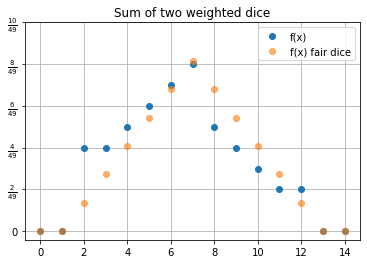

In [12]:
x = np.linspace(0,14,15);
PDF = np.array([0,0,4,4,5,6,7,8,5,4,3,2,2,0,0]) / 49;
origPDF = np.array([0,0,1,2,3,4,5,6,5,4,3,2,1,0,0]) / 36;

ticks = np.arange(0,10/49, 2/49)
l = ['0', r'$\frac{2}{49}$', r'$\frac{4}{49}$', r'$\frac{6}{49}$', r'$\frac{8}{49}$', r'$\frac{10}{49}$']

plt.plot(x,PDF, "o", label="f(x)")
plt.plot(x,origPDF, "o", label="f(x) fair dice",alpha=0.6)
plt.legend();
plt.title("Sum of two weighted dice")
plt.yticks(ticks, labels=l)
plt.grid(True)
plt.show()

https://www.tablesgenerator.com/markdown_tables#

## 3. PDF and CDF

Suppose that a random variable $X$ has PDF defined by

$$
f_X(x) = \left \{
\begin{array}{ll}
a(1+x) & \; \mathrm{if} \; -1 < x \leq 0 \\
a(1-x) & \; \mathrm{if} \; 0 < x < 1 \\
0 & \; \mathrm{otherwise}.
\end{array}
\right .
$$

a) What does the value of $a$ need to be to make $f_X$ a probability distribution? Plot $f_X$ for this value.

b) Find and plot $F_X$.

c) Find $b$ such that $P[X>b] = \frac{1}{2} P[X \leq b]$. 

**Grading Breakdown:**

    2pts (a) for finding a
    2pts (a) for plotting fx
    2pts (b) for finding FX
    2pts (b) for plotting Fx
    2pts (c) for finding b

***
3.a)

Recall from lecture the **Properties of the PDF:**

a) $\int_{-\infty}^\infty f_X(x) dx = 1$

b) $F_X(x) = \sum f_X(x)$, assuming $x$ takes on discrete values. 

Thus, we can find $a$ by normalizing:

$$\begin{align}
1 &= \int^{\infty}_{-\infty} f_X(x)dx \\
&= a \int^{0}_{-1}{1+x}dx + a \int^{1}_{0}{1-x}dx \\
&= a (x + \frac{x^2}{2})\bigg \rvert_{x=-1}^{x=0} + a (x - \frac{x^2}{2})\bigg \rvert_{x=0}^{x=1} \\
&= a\big(0 - ((-1) + \frac{1}{2}) \big) + a (1 - \frac{1}{2}) \\
&= a
\end{align}$$

thus, $a=1$.

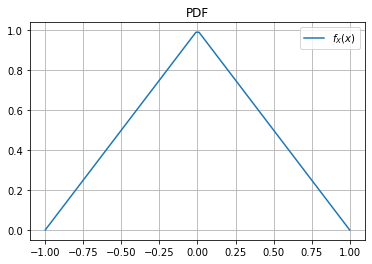

In [28]:
x = np.linspace(-1,1,100)
a = 1
f = np.where(x <= 0, a*(1+x), a*(1-x))

plt.plot(x, f, label="$f_X(x)$")
plt.title("PDF")
plt.legend()
plt.grid(True)
plt.show()

***
3.b)

The CDF can be found by integrating the PDF piecewise and adding in previous accumulations:

$$
F_X(x) = \int_{-\infty}^{x}{f_X(t)}dt \\
$$
 
We know that coming from the left, there is no probability mass until we reach the support of $f_X(x)$, so

$$
F_X(x) = 0, \; \mathrm{if} \; x\leq -1.
$$

Next on the interval $x\in(-1,0]$ we have nozero probability, thus
$$\begin{align}
F_X(x) &= \int_{-1}^{x}{(1+t})dt \\
&= (t + \frac{t^2}{2})\bigg \rvert_{t=-1}^{t=x} \\
&= \frac{x^2}{2} + x + \frac{1}{2} \\.
\end{align}
$$

On the interval $x\in(0,1)$ we have already accumulated some probability and also need to integrate, thus

$$\begin{align}
F_X(x) &= F_X(0) + \int_{0}^{x}{(1-t)}dt \\
&= \frac{1}{2} + (t - \frac{t^2}{2})\bigg \rvert_{t=0}^{t=x} \\
&= \frac{1}{2} + x + \frac{-x^2}{2}.
\end{align}
$$

Finally, on $x\geq 1$ all the probability mass has been accumulated so 
$$
F_X(x) = 1, \; \mathrm{if} \; x\geq 1.
$$


Putting it all together we find:
$$
F_X(x) = 
    \begin{cases} 
    0, \quad \quad \quad \quad \quad \mathrm{if} \; x\leq -1 \\    
    \frac{1}{2}(x+1)^2, \quad \;\;\; \mathrm{if} \; x\in(-1,0] \\
    1 - \frac{1}{2}(x-1)^2, \; \mathrm{if} \; x\in(0,1) \\ 
    1, \quad \quad \quad \quad \quad \mathrm{if} \; x \geq 1.
    \end{cases} 
$$

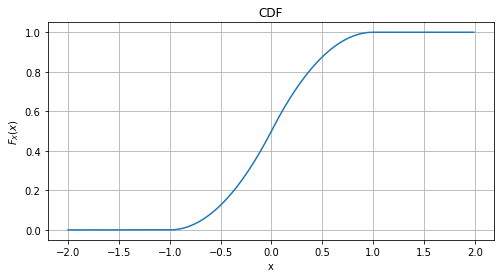

In [133]:
x = np.arange(-2,2,0.01)

F1 = list(np.where(x[x <= -1], 0, 1)) # If x <= -1 assign 0 

Fa = x[x > -1] # Consider all xs > -1
F2 = list(np.where(Fa[Fa <= 0], 0.5*(Fa[Fa < 0]+1)**2, 1)) # If -1 < xs <= 0 assign 0.5(x+1)**2

Fb = x[x < 1] # Consider all xs < 1
F3 = list(np.where(Fb[Fb > 0], 1-0.5*(Fb[Fb > 0]-1)**2, 1)) # If 0 < xs < 1 assign 1 - 0.5(x-1)**2

F4 = list(np.where(x[x >= 1], 1, 1)) # If xs > 1 assign 1 

F = F1 + F2 + F3 + F4 # simply append the lists in the correct order

fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(x, F)
ax.set_title("CDF")
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel(r'$F_X(x)$')
plt.show()

- https://math.stackexchange.com/questions/118742/finding-a-cdf-given-a-pdf

***
3.c)

In order to find $b$ such that $P[X>b] = \frac{1}{2} P[X \leq b]$ we need to go back to the definition of the CDF:

$$
F_X(x) = P[X \leq x]
$$
Using the fact that probabilities sum to one over all space we see:

$$
P[X > x] = 1 - P[X \leq x]. 
$$
Thus
$$\begin{align}
P[X > b] &= \frac{1}{2} P[X \leq b]\\ 
 \implies 1 - P[X \leq b] &= \frac{1}{2} P[X \leq b] \\
 \implies P[X \leq b] &= \frac{2}{3}.
\end{align}
$$

Looking at the graph we can tell that $b$ is somewhere around $(0,\frac{1}{2})$, thus we'll use the relevant part of the CDF to find an expression for $b$:

$$\begin{align}
F_X(b) = \frac{2}{3}
& = 1 - \frac{1}{2}(b - 1)^2 \\
\implies \frac{2}{3} &= (b - 1)^2 \\ 
\implies \pm \sqrt{\frac{2}{3}} &= b - 1 \\
\implies b & = 1\pm\sqrt{\frac{2}{3}}.
\end{align}$$

The valid choice is $b = 1 - \sqrt{\frac{2}{3}} =0.183503419072274.$

In [148]:
b = sm.symbols('b')
expr = sm.Rational(1,3) - sm.Rational(1,2)*(b-1)**2
bs = sm.solve(expr)

1 - sm.Rational(1,2)*(bs[0] - 1)**2 # Check F_X(b) in 0 < xs < 1

2/3

### Readings:
- https://newonlinecourses.science.psu.edu/stat414/node/97/ 
- http://www.mathwave.com/articles/calculate-probability-distributions.html
- https://math.stackexchange.com/questions/1720053/how-can-a-probability-density-function-pdf-be-greater-than-1
- http://rovdownloads.com/attachments/newsletters/Newsletter%2004%20-%20Tips%20on%20Interpreting%20PDF,%20CDF,%20ICDF%20(4P).pdf

## 4. Functions of a Random Variable

Suppose $X$ is distributed uniformly in the interval $[0,1]$. That is, $f_X(x) = 1$ if $x \in [0,1]$ and $f_X(x) = 0$ otherwise. 

a) What is the CDF of $X$?

b) Let $Y = X^2$. Find and plot $F_Y$ and $f_Y$. 

c) Let $Z = - \frac{1}{\lambda} \ln X$. Find and plot $F_Z$ and $f_Z$. 

**Grading Breakdown:**

    2pts (a) for finding the CDF of X 
    2pts (b) for finding Fy and fy 
    2pts (b) for plotting Fy and fy
    2pts (c) for finding Fz and fz 
    2pts (c) for plotting Fz and fz 

***
4.a)

We know that coming from the left, there is no probability mass until we reach the support of $f_X(x)$, so

$$
F_X(x) = 0, \; \mathrm{if} \; x < 0.
$$

On the interval $x\in[0,1]$ we need to integrate, thus

$$\begin{align}
F_X(x) &= \int_{0}^{x}{\frac{1}{1-0}}dt \\
&= (t)\bigg \rvert_{t=0}^{t=x} \\
&= x.
\end{align}
$$

Finally, on $x > 1$ all the probability mass has been accumulated so 
$$
F_X(x) = 1, \; \mathrm{if} \; x > 1.
$$


Putting it all together we find:
$$
F_X(x) = 
    \begin{cases} 
    0, \quad  \mathrm{if} \; x < 0 \\    
    x, \;\;\;\; \mathrm{if} \; x\in[0,1] \\ 
    1,  \quad \mathrm{if} \; x > 1.
    \end{cases} 
$$

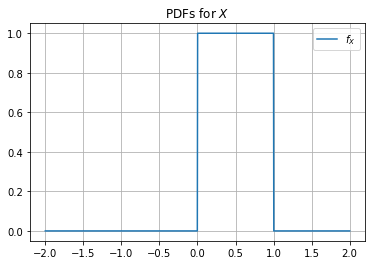

In [259]:
x = np.linspace(-2,2,1000)

xs = x[x < 0]
fx = list(np.where(xs < 0, 0, 0)) 

xs = x[x <= 1]
fx += list(np.where(xs[xs >= 0], 1, 0)) 

xs = x[x > 1]
fx += list(np.where(xs, 0, 0))

plt.plot(x, fx, label="$f_X$")
plt.title("PDFs for $X$")
plt.legend()
plt.grid(True)
plt.show()

***
4.b)

If $Y = X^2$ (i.e. a strictly increasing function) then

$$
\begin{align}
F_Y(y) &= P[Y \leq y] \\ 
&= P[X^2 \leq y] \\
&= P[-\sqrt{y} \leq X \leq \sqrt{y}] \\
&= P[X \leq \sqrt{y}] \\ 
&= F_X(\sqrt{y}) \\
&= \int_{0}^{\sqrt{y}}(1)dt, \text{ for } y\in[0,1]\\
&= \sqrt{y}.
\end{align}$$
Putting it all together we have
$$
F_Y(y) =
\begin{cases} 
    0, \quad  \mathrm{if} \; y < 0^2 \\    
    \sqrt{y}, \; \mathrm{if} \; y\in[0^2,1^2] \\ 
    1, \quad \mathrm{if} \; y > 1^2.
\end{cases} 
$$

**Alternatively**, we consider $u(x) = y = x^2$ and inverse transform $v(y) = x = \sqrt{y}$. For a strictly monotonic function of a continuous variable and on the interval of interest, $x\in[0,1], y\in[u(0),u(1)]$ we have:

$$ \begin{align}
f_Y(y) &= f_X\big(v(y)\big)|v'(y)| \\
&= (1)\frac{1}{2\sqrt{y}}
\end{align}
$$
and we can integrate to get the CDF.

In [253]:
n = 3.5

# Let's construct the CDF F_X(x)
x = np.linspace(-1,n,101)

xs = x[x < 0]
Fx = list(np.where(xs < 0, 0, 0)) # Case: x < 0

xs = x[x <= 1] 
Fx += list(np.where(xs[xs >= 0], xs[xs >= 0], 0)) # Case: x in [0,1]

xs = x[x > 1]
Fx += list(np.where(xs, 1, 0)) # Case: x > 1

# Let's construct teh CDF F_Y(y)
Fy = np.power(Fx,0.5)

In [254]:
# Let's construct the PDF f_Y(y)
y = np.linspace(-1,n,101)

ys = y[y < 0]
fy = list(np.where(ys < 0, 0, 0)) # Case: x < 0

ys = y[y <= 1]
fy += list(np.where(ys[ys >= 0], 1 / (2*np.sqrt(ys[ys >= 0])), 0)) # Case: x in [0,1]

ys = y[y > 1]
fy += list(np.where(ys, 0, 0)) # Case: x > 1

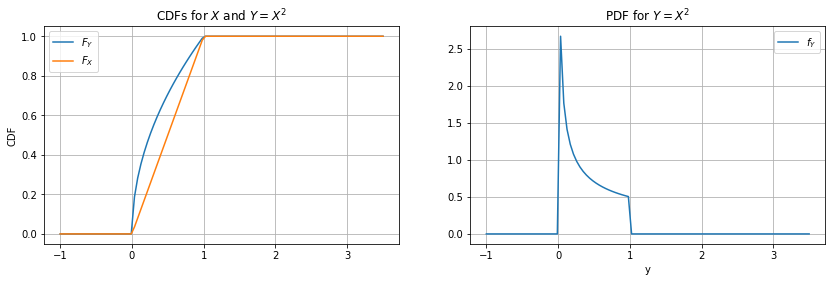

In [255]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

ax[0].plot(x, Fy, label="$F_Y$")
ax[0].plot(x, Fx, label="$F_X$")
ax[0].set_title("CDFs for $X$ and $Y = X^2$")
ax[0].legend()
ax[0].set_ylabel(r'CDF')
ax[0].grid(True)

ax[1].plot(y, fy, label="$f_Y$")
ax[1].set_title("PDF for $Y= X^2$")
ax[1].set_xlabel("y")
ax[1].legend()
ax[1].grid(True)

plt.show()

**Note:** It's OKAY for the PDF to be greater than $1$. The *area* is what contains the probaiblity so the total area under the curve must be $1$.

***
4.c)

For $Z = - \frac{1}{\lambda} \ln X$ we define $u(X) = - \frac{1}{\lambda} \ln X= Z$ and $v(Z) = e^{-\lambda Z} = X$.

$$\begin{align}
F_Z(z) &= P[Z\leq z] \\
&= P[- \frac{1}{\lambda} \ln X \leq z] \\
&= P[\ln{X} > -\lambda z ] \\
&= P[X > e^{-\lambda z}] \\
&= 1 - P[X \leq e^{-\lambda z}] \\
&= 1 - F_X(e^{-\lambda z}) \\
&= 1 - e^{-\lambda z}.
\end{align}$$

To get the PDF we simply differentiate the CDF:

$$
f_Z(z) = \frac{d}{dz}(1 - e^{-\lambda z}) \\
= \lambda e^{-\lambda z}.
$$

**Alternatively**, we could procede like so:

Let $f_X(x) = 1$ on $x\in[0,1]$ and let $Z = u(x) = \frac{-1}{\lambda} \ln X$ be a $1-1$ mapping from $X = \{x : x\in[0,1]\}$ to $Z = \{z : z\geq 0\}$. The range of $Z$ comes from $u(0)=\infty$ and $u(1)=0$.

We see that $X = v(Z) =  u^{-1}(Z) = e^{-\lambda Z}$ and $\frac{dX}{dZ} = -\lambda e^{-\lambda Z}$.

Then 
$$\begin{align}
f_Z(z) &= f_X\big(u^{-1}(z)\big)\bigg \rvert \frac{dx}{dz} \bigg \lvert \\
&= (1) \bigg \rvert -\lambda e^{-\lambda z} \bigg \lvert \\
&= \lambda e^{-\lambda z}
\end{align}$$
for $z\geq 0$.

To get the CDF we then integrate:

$$\begin{align}
F_Z(z) &= \int_{0}^{z} \lambda e^{-\lambda t} dt \\
&= - e^{\lambda t} \big \rvert_{t=0}^{t=z} \\
&= 1 - e^{-\lambda z}
\end{align}$$
for $z\geq 0$.

Putting it all together:

$$
F_Z(z) =
\begin{cases} 
    0, \quad \quad \;\;\; \mathrm{if} \; z < 0 \\    
    1 - e^{-\lambda z}, \; \mathrm{if} \; z\geq 0
\end{cases} 
$$

In [256]:
# Let's construct the PDF f_Z(z)
z = np.linspace(-1,n,101)
l = 1

zs = z[z < 0]
fz = list(np.where(zs < 0, 0, 0)) # Case: z < 0

zs = z[z >= 0]
fz += list(np.where(zs, l*np.exp(-l*zs), 0)) # Case: z >= 0

In [257]:
# Let's construct the CDF F_Z(z)

zs = z[z < 0]
Fz = list(np.where(zs < 0, 0, 0)) # Case: z < 0

zs = z[z >= 0]
Fz += list(np.where(zs, 1 - np.exp(-l*zs), 0)) # Case: z >= 0

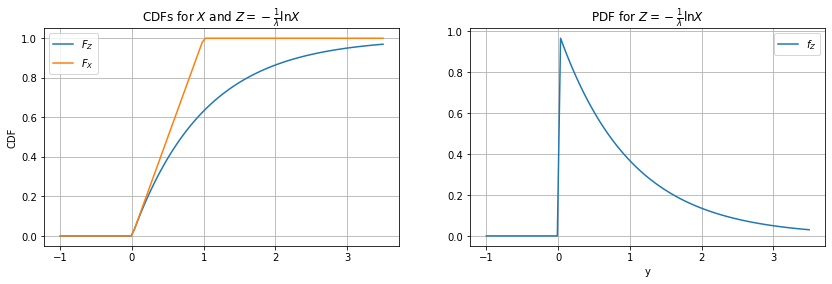

In [258]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

ax[0].plot(z, Fz, label="$F_Z$")
ax[0].plot(z, Fx, label="$F_X$")
ax[0].set_title(r"CDFs for $X$ and $Z= -\frac{1}{\lambda} \ln {X}$")
ax[0].legend()
ax[0].set_ylabel(r'CDF')
ax[0].grid(True) 

ax[1].plot(z, fz, label="$f_Z$")
ax[1].set_title(r"PDF for $Z= -\frac{1}{\lambda} \ln {X}$")
ax[1].set_xlabel("y")
ax[1].legend()
ax[1].grid(True)

plt.show()

### Similar Problems, Techniques, and Alternative Explanations:

- https://newonlinecourses.science.psu.edu/stat414/node/135/
- https://newonlinecourses.science.psu.edu/stat414/node/156/
- https://newonlinecourses.science.psu.edu/stat414/node/157/
- https://newonlinecourses.science.psu.edu/stat414/node/158/
- http://web.stanford.edu/class/archive/ee/ee178/ee178.1172/hw/hw7_sn.pdf
- https://math.stackexchange.com/questions/1531572/density-of-x2-when-x-has-uniform-1-2-distribution
- https://math.stackexchange.com/questions/305997/does-the-square-of-uniform-distribution-have-density-function
- https://math.stackexchange.com/questions/2132210/let-u-be-a-uniform-random-variable-on-0-1

## 5. Markov Process Properties

Consider the following three Markov Processes.

<img src="https://github.com/klavins/EE502P/blob/master/images/HW-MPs.jpeg?raw=1" width=80%>

For each process,

i) Find the period of each state.

ii) Identify transient states.

iii) Identify absorbing states and absorbing subsets of states.

iv) Identify ergodic states.

**Grading Breakdown:**

    2.5pts for identifying the period of each state in a) b) c)
    2.5pts for identifying the transient states in a) b) c)
    2.5pts for identifying the absorbing states and absorbing subsets of states in a) b) c)
    2.5pts for identifying ergodic states in a) b) c)

***
### Definition of Markov:

**Def:** A process is **Markov** if 

$$
P[X_{k+1} = x_{k+1} \;|\; X_k = x_k, ..., X_0 = x_0 ] = P[X_{k+1} = x_{k+1} \;|\; X_k = x_k ].
$$

That is, *the probability that the next state is equal to some value is dependent only on the current state.*

**Def:** A Discrete time, discrete state Markov Process (also commonly called a **Markov Chain**) can be specified using a directed graph whose edges are labeled by a transition probability. In particular, let $G=(V,E)$ be a *directed* graph and let $Q:E \rightarrow [0,1]$ be such that for all $u \in V$

$$
\sum_{v \in \Gamma(v)} Q(u,v) = 1.
$$

With this specification, the state $X_i$ is a random variable whose values range over $V$ and

$$
P[X_{k+1} = v \;|\; X_k = u] = Q(u,v). 
$$
***

### Properties:

**Def:** A Markov Process is called **irreducible** if it is there is a path from any state to any other state. Otherwise it is called **reducible**. 

**Def:** A state $x$ has **period** $k$ if starting in state $x$, if $x$ is returned to, it is returned to in $mk$ steps for some $m$. If $k=1$ for a given state, then it is called **aperiodic**. 

**Def:** A state is **transient** if there is a nonzero probability that it will not be returned to once left (i.e. it will only be visited a finite number of times). Otherwise the state is called **recurrent**. (Moreover, a chain is **recurrent** if every state is recurrent.)

**Def:** A state is called **absorbing** if it cannot be left once reached. A subset of states is also called **absorbing** if it cannot be left once reached. 

**Def:** A state is **ergodic** if it is aperiodic and there is a nonzero probability that it will be visited an infinite number of times in any trajectory. (Moreover, a chain is **ergodic** if every state is ergodic.)
***

**Remark 1:** If $i$ is a recurrent state, then the set of states, $A(i)$, that are accessible from $i$ form a **recurrence class,** $R$, (i.e. the states in $A(i)$ are all accessible from each other and no state outside of $A(i)$ is accessible from them.)
***
**Remark 2:** 
1. A way to verify the aperodicity of a recurrence class  $R$ is to check whether there exists a special time $n\geq 1$ and a special state $i\in R$ from which all states in $R$ can be reached in $n$ steps. This means that for states $i,j$ where $i \neq j$

$$r_{ij}(n) > 0 \text{ for } \forall j\in R.$$

2. Alternatively, $\forall n\in N, r_{ij}(n) = P(X_n = i|X_0 = i) > 0 \iff n \in G(i)$. This means that the set $G(i)$ contains $n$ if we can take a sequence of $n$ arrows to go from state $i$ back to state $i$. We then let
$\bf{d(i) = gcd(G(i))}$ **be the period**. If $d(i) = 1$, the Markov Chain is aperiodic. 

   For example, in the lecture notebook, Markov Process c) has $G(i) = \{3,6,9,\dots\}$ and $d(i) = gcd(G(i)) = 3$. Thus, it's periodic with period $3$.
   
   However, Markov Process d) in the lecture notebook has $G(i) = \{1,3,4,5,6,\dots\}$ so  $d(i) = gcd(G(i)) = 1$. Thus, it is aperiodic
   
***

**Remark 3:** 

If the state $k$ is **transient** (return to the state is uncertain) or **null-recurrent** (return to the state is certain, but the expected return time is infinite), then

$$
\mathbb{P}(X_t=k | X_0=k) = (Q^t)_{kk}\rightarrow 0 \text{ as } t \rightarrow \infty.
$$

If the state $k$ is **positive-recurrent** (return to the state is certain, and the expected return time is finite), then

$$
\mathbb{P}(X_t=k | X_0=k) = (Q^t)_{kk}\rightarrow \pi_k \neq 0 \text{ as } t \rightarrow \infty.
$$

***
5.a) 

1. *All states are aperiodic.* Using Remark 2 the special time is $n=3.$


2. *All states are recurrent.*


3. *No state (or subset of states) is absorbing.*


4. *All states are ergodic.*

In summary:

| State  | Periodic  | Transient  | Absorbing  | Ergodic |
|--------|-----------|------------|------------|---------|
| 0      |  No       | No         | No         | Yes     |
| 1      |  No       | No         | No         | Yes     |
| 2      |  No       | No         | No         | Yes     |

5.b)

1. *All states are aperiodic.* Using Remark 2 the special time is $n=4.$


2. *All states are recurrent.* This can be seen from the long-term behavior of the update matrix in the questions below. I.e. since the $k^{th}$ diagonal entry of $Q^{\infty}$ is nonzero:

$$
\mathbb{P}(X_t=k | X_0=k) = (Q^t)_{kk}\rightarrow \pi_k \neq 0 \text{ as } t \rightarrow \infty \implies \text{ state } k \text{ is positive recurrent.}
$$

3. *No state (or subset of states) is absorbing.*


4. *All states are ergodic.* 

In summary:

| State  | Periodic  | Transient  | Absorbing  | Ergodic |
|--------|-----------|------------|------------|---------|
| 0      |  No       | No         | No         | Yes      |
| 1      |  No       | No         | No         | Yes      |
| 2      |  No       | No         | No         | Yes      |
| 3      |  No       | No         | No         | Yes     |

5.c)

1. *State $0$ is aperiodic. States $\{1,2\}$; $\{3,4\}$; and $\{5,6\}$ are all periodic with period $2$.*


2. *State $0$ is transient. States $\{1,2\}$; $\{3,4\}$; and $\{5,6\}$ are all recurrent.* (In this case there are 3 classes of recurrent states.)


3. *States $\{1,2\}$; $\{3,4\}$; and $\{5,6\}$ are all absorbing subsets.*


4. *No state is ergodic.*

In summary:

| State  | Periodic| Transient  | Ergodic |
|--------|---------|------------|---------|
| 0      |  No     | Yes        | No      |
| 1      |  Yes    | No         | No      |
| 2      |  Yes    | No         | No      |
| 3      |  Yes    | No         | No      |
| 4      |  Yes    | No         | No      |
| 5      |  Yes    | No         | No      |
| 6      |  Yes    | No         | No      |

### Readings and motivating resources:

- https://bookdown.org/probability/beta/markov-chains.html
- For visualization:  http://setosa.io/ev/markov-chains/
- Toy model of weather prediction: https://www.ias.ac.in/article/fulltext/reso/018/04/0368-0377
- https://michaelrzhang.github.io/assets/markovchains.pdf
- Design FSM in Latex: http://madebyevan.com/fsm/

## 6. Stationary Distributions

For each Markov Process in Problem 5:

i) Find the update matrix $Q$.

ii) Simulate the dynamics $p_{k+1} = p_k Q$ starting at the distribution in which $p_0(0) = 1$. Make a nice plot of the dynamics for each system. To do this, plot a 2D grid where grid point $(k,i)$ is a gray-scale square corresponding to the probability that the process is in state $i$ at time $k$ (the Gambler's Ruin example in the notes does this). 

iii) Find the left eigenvector(s) corresponding to the stationary distribution(s) of the process. If there is more than one such eigenvector, describe the space of stationary distributions as a linear combination of them.

iv) Find the reachable stationary distribution assuming $p_0(0) = 1$ (i.e. we start at node $0$). 

**Grading Breakdown:**

    2pts (a) for finding all the update matrices
    1pt  (b) for coding the matrices in python
    1pts (b) for plotting
    1pt  (c) per eigenvector corresponding to the stationary distributions(s) of each Q (3pts total) 
    1pt  (d) per reachable stationary distribution (3pts total) 

***
6.i)

The format of these matrices is:

$$
\begin{matrix} & \text{To:} \\
\text{From:} & \begin{pmatrix}
\cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot 
\end{pmatrix}
\end{matrix}
$$
The update matrices we're considering are:

$
Q_A = 
\begin{pmatrix}
0 & 0.5 & 0.5 \\
0.5 & 0 & 0.5 \\
0.5 & 0.5 & 0
\end{pmatrix}_{3x3}
$
$
Q_B = 
\begin{pmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
0.5 & 0 & 0 & 0.5
\end{pmatrix}_{4x4}
$
$
Q_C = 
\begin{pmatrix}
0 & 0.5 & 0 & 0.25 & 0 & 0.25 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & 1 & 0\\
\end{pmatrix}_{7x7}
$

***
6.ii)

Let's define our matrices to switch betweeen `numpy` and `sympy`.

In [78]:
def Qa(sympy=True):
    '''Allows user to toggle between numpy and sympy versions'''
    a = 0.5
    Qa = [[0.0, a, a], [a, 0.0, a], [a, a, 0.0]]
    Qa = sm.Matrix(Qa) if sympy == True else np.asarray(Qa)
    return Qa

def Qb(sympy=True):
    '''Allows user to toggle between numpy and sympy versions'''
    Qb = [[0, 1, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1],[0.5, 0, 0, 0.5]]
    Qb = sm.Matrix(Qb) if sympy == True else np.asarray(Qb)
    return Qb

def Qc(sympy=True):
    '''Allows user to toggle between numpy and sympy versions'''
    a = 0.5
    b = 0.25
    Qc = [[0, a, 0, b, 0, b, 0],
          [0, 0, 1, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 1, 0, 0],
          [0, 0, 0, 1, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 1],
          [0, 0, 0, 0, 0, 1, 0]]
    Qc = sm.Matrix(Qc) if sympy == True else np.asarray(Qc)
    return Qc

In [5]:
def dynamics(k, Q, p):
    '''
    Assumes k is the numer of steps
            Q is the update matrix
            p0 is the starting distribution.
    Returns a matrix of trajectories.
    '''
    trajectory = [p]
    for t in range(k):
        p = p @ Q
        trajectory.append(p)
    trajectory = np.matrix(trajectory).transpose()
    return trajectory

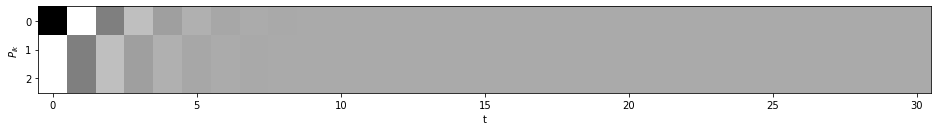

In [6]:
# Dynamics of Qa

k = 30
p0 = np.array([1, 0, 0])
traj = dynamics(k, Qa(sympy=False), p0) 

fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(traj,cmap="gray_r")
ax.set_xlabel("t")
ax.set_ylabel(r"$P_{ik}$")
plt.show()

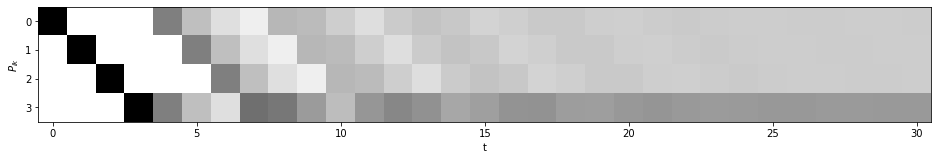

In [425]:
# Dynamics of Qb

p0 = np.array([1, 0, 0, 0])
traj = dynamics(k, Qb(sympy=False), p0) 

fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(traj,cmap="gray_r")
ax.set_xlabel("t")
ax.set_ylabel(r"$P_{ik}$")
plt.show()

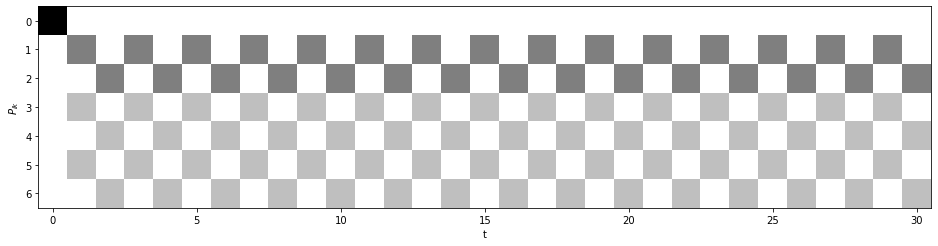

In [426]:
# Dynamics of Qc

p0 = np.array([1, 0, 0, 0, 0, 0, 0])
traj = dynamics(k, Qc(sympy=False), p0) 

fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(traj,cmap="gray_r")
ax.set_xlabel("t")
ax.set_ylabel(r"$P_{ik}$")
plt.show()

***
6.iii)

### Review:

Recall that a stationary probability vector  $p^*$  has the property that $p^*Q = p^*$. Thus,  $p^∗$  is a left eigenvector of  $Q$  with left eigenvalue 1. This corresponds to the **stationary distribution** of the process.

**Remark 1:** A left eigenvector of $Q$ is equivalent to the transpose of a right eigenvector of $Q^T$, with the same eigenvalue. Moreover, because $det(Q-sI)=det(Q^T-sI) \implies$ the eigenvalues of the left eigenvectors of $Q$ are the same as the eigenvalues of the right eigenvectors of $Q^T$.

**Remark 2:** A necessary condition to have a unique stationary distribution is that the state transition diagram be a singly connected component (i.e. we can get from any state to any other state). This type of Markov chain is called **irreducible.**

***
First, let's analyze $Q_a.$

In [345]:
Qa().left_eigenvects() # Returns [(eigenval, multiplicity, eigenvector(s)),...]

[(-0.5, 2, [[-1.0  1.0  0], [-1.0  0  1.0]]), (1.0, 1, [[1.0  1.0  1.0]])]

Therefore, for $Q_a$, the left eigenvector corresponding to the stationary distribution of the process is:

$$\frac{1}{1+1+1}\begin{pmatrix}{1} & {1} & {1}\end{pmatrix}=\begin{pmatrix}\frac{1}{3} & \frac{1}{3} & \frac{1}{3}\end{pmatrix}$$.
***

Now let's analyze $Q_b.$

In [295]:
v1,v2,v3,v4 = Qb().left_eigenvects()
# w,vl = scipy.linalg.eig(Qb, left=True, right=False) # alternative method: numpy solution
v1

(1.0, 1, [[0.5  0.5  0.5  1.0]])

In [290]:
a = sm.symbols('a')
expr = 0.5*a + 0.5*a + 0.5*a + a - 1 # Let's quickly solve for the scaling factor
sm.solve(expr)

[0.4]

Therefore, for $Q_b$, the left eigenvector corresponding to the stationary distribution of the process is:

$$\frac{2}{5}\begin{pmatrix}\frac{1}{2} & \frac{1}{2} & \frac{1}{2} & 1\end{pmatrix}= \begin{pmatrix}\frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{2}{5}\end{pmatrix}.$$
***

Finally, let's analyze $Q_c.$

In [427]:
info = Qc().left_eigenvects()
info

[(-1.0, 3, [[0  -1.0  1.0  0  0  0  0], [0  0  0  -1.0  1.0  0  0], [0  0  0  
0  0  -1.0  1.0]]), (0, 1, [[-4.0  0  2.0  0  1.0  0  1.0]]), (1.0, 3, [[0  1.
0  1.0  0  0  0  0], [0  0  0  1.0  1.0  0  0], [0  0  0  0  0  1.0  1.0]])]

So the left eigenvectors of $Q_c$ corresponding to $\lambda=1$ are:

$v_1=\begin{pmatrix} 0 & 1 & 1 & 0 & 0 & 0 & 0\end{pmatrix}, v_2= \begin{pmatrix} 0 & 0 & 0 & 1 & 1 & 0 & 0\end{pmatrix},$ and $v_3=\begin{pmatrix} 0 & 0 & 0 & 0 & 0 & 1 & 1\end{pmatrix}$.

Since there is more than one of such an eigenvector, we'll describe the space of stationary distributions as a linear combination of them:

$$ \begin{align}
p^* &= \frac{1}{4}v_1 + \frac{1}{8}v_2 + \frac{1}{8}v_3 \\
&= \begin{pmatrix} 0 & \frac{1}{4} & \frac{1}{4} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8}\end{pmatrix}.
\end{align}$$

This means that this Markov chain is *reducible* and cannot have a unique stationary distribution. 

***
6.iv)

### Review:

To determine the **reachable** stationary distribution assuming $p_0(0) = 1$ (i.e. we start at node $0$), we need to use the update rule:

$$
p_{k+1} = p_k Q .
$$

Note that by substituting in $p_{k-1}Q$ and iterating, we can show that

$$
p_{k} = p_0 Q^k
$$

If we find $Q^k$ and take the limit as $k \rightarrow \infty$ we should find the steady state distribution.

***
For $Q_a$ we simulate the long term behavior by picking a big enough $k$ such that $p_k$ is steady state in order to check our work. Analysis leads us to see: 

$$
\lim \limits_{k\rightarrow \infty}Q_A^{k} = 
\begin{pmatrix}
\frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
\frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
\frac{1}{3} & \frac{1}{3} & \frac{1}{3}
\end{pmatrix}_{3x3}
$$
so
$$\begin{align}
p^*
&=
\begin{pmatrix} 1 & 0 & 0 \end{pmatrix} 
\begin{pmatrix}
\frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
\frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
\frac{1}{3} & \frac{1}{3} & \frac{1}{3}
\end{pmatrix}_{3x3} \\
&= \begin{pmatrix} \frac{1}{3} & \frac{1}{3} & \frac{1}{3} \end{pmatrix}.
\end{align}$$

In [82]:
k = 51
p0 = sm.Matrix([[1,0,0]]) # initila distribution
pk = p0 @ Qa()**k         # Update equation

pk, pk @ Qa()             # i.e. the equation: p* = p*Q_a

([0.333333333333333  0.333333333333333  0.333333333333333], [0.333333333333333
  0.333333333333333  0.333333333333333])

***
For $Q_b$ we simulate the long term behavior by picking a big enough $k$ such that $p_k$ is steady state in order to check our work. Analysis leads us to see: 

$$
\lim \limits_{k\rightarrow \infty}Q_b^{k} = 
\begin{pmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
0.5 & 0 & 0 & 0.5 \\
\end{pmatrix}_{4x4}^k
$$
does exist (and is shown in the next line), so
$$\begin{align}
p^*&=
\begin{pmatrix} 1 & 0 & 0 & 0 \end{pmatrix} 
\begin{pmatrix}
0.2 & 0.2 & 0.2 & 0.4 \\
0.2 & 0.2 & 0.2 & 0.4 \\
0.2 & 0.2 & 0.2 & 0.4 \\
0.2 & 0.2 & 0.2 & 0.4 \\
\end{pmatrix} \\
&= \begin{pmatrix} 0.2 & 0.2 & 0.2 & 0.4 \end{pmatrix}.
\end{align}$$

In [83]:
k = 180
p0 = sm.Matrix([[1,0,0,0]]) # initila distribution
pk = p0 @ Qb()**k           # Update equation
pk, pk @ Qb()               # i.e. the equation: p* = p*Q_b

([0.2  0.2  0.2  0.4], [0.2  0.2  0.2  0.4])

***
For $Q_c$ the long term behavior oscillates between different states given $k$ is even or odd. Analysis leads us to see: 

$$
\lim \limits_{k\rightarrow \infty}Q_c^{k} = 
DNE.
$$

This means that the **limiting distribution** does **not** exist, however, as we showed earlier, a stationary distribution still exists.

In [90]:
a = sm.Rational(1,4)
b = sm.Rational(1,8)
p = sm.Matrix([[0, a, a, b, b, b, b]])

p, p @ Qc() # i.e. the equation: p* = p*Q_b for the stationary distribution

([0  1/4  1/4  1/8  1/8  1/8  1/8], [0  1/4  1/4  1/8  1/8  1/8  1/8])

***
### Alternative method using the eigenstructure of the update matrix:

Let $M$ be the matrix of eigenvectors of $Q$ stacked from left-to-right (called the *modal matrix*) and $\Lambda$ be the matrix of eigenvalues of $Q$. Then:

$$
\begin{align}
\Pi &= \lim \limits_{n\rightarrow \infty} Q^n \\
&= \lim \limits_{n\rightarrow \infty} (M \Lambda M^{-1})^n \\
&= \lim \limits_{n\rightarrow \infty} M \Lambda^{n} M^{-1}
\end{align}
$$

is the equilibrium probability matrix.

**Remarks:**
- The presence of more than one $\lambda(Q) = 1$ indicates the presence of **sub-Markov chains** (i.e. absorbing subsets).
- If a column in $\Pi$ is all zeros, then the state associated with that column is *transient*.
- We can partition $\Pi$ into block structures that are associated with closed sets of recurring states and transient states.

### Readings and other resources:

- https://www.stat.auckland.ac.nz/~fewster/325/notes/ch8.pdf
- https://www.stat.auckland.ac.nz/~fewster/325/notes/ch9.pdf

- https://www.math.wustl.edu/~feres/Math450Lect04.pdf

## 7. Means and standard deviations

For each process in problem 6, find the *mean* and *standard deviation* of the **value of the state in the reachable stationary distribution**. For example, in process (a), the stationary distribution has all states equally likely, so the mean would be $\frac{1}{3} (0+1+2) = 1$. 

**Grading Breakdown:**

    10/6 pts per answer (10pts total)

***

### Review:

The **weighted arithmetic mean** in the discrete setting is described by:

$$\mu = \frac {\sum \limits_{i=1}^n w_i x_i } {\sum \limits _{i=1}^{n}w_{i}} = E[X] = \sum_x x \;f_X(x).$$

The **variance** (which is the square of the standard deviation) is described by the second moment:

$$\sigma^2 = E[X^2] - \mu^2.$$

***
7.a) 

Since the stationary distribution has all states equally likely, the mean would be 

$$ \mu_a = \frac{1}{3}(0+1+2)=1. $$

The standard deviation is 

$$\sigma_a = \sqrt{\frac{1}{3}(0^2+1^2+2^2)- 1^2} = \sqrt{\frac{2}{3}}.$$ 

***
7.b) 

The mean of the $2^{nd}$ Markov Chain's reachable stationary distribution is 

$$\mu_b = \frac{1}{5}(0+1+2) + \frac{2}{5}(3) = \frac{9}{5}.$$

The standard deviation is 

$$\sigma_b = \sqrt{\frac{1}{5}(0^2+1^2+2^2) +\frac{2}{5}(3^2)- (\frac{9}{5})^2} = \frac{\sqrt{34}}{5}.$$

In [5]:
s = np.array([0, 1, 2, 3])
w = np.array([.2, .2, .2, .4])
sm = np.average(s, weights = w)

# All very close. Discrepancy likely due to round-off error 
np.sqrt(sum( w * np.power(s - sm, 2))), np.sqrt(0.2*(1+4) + 0.4*(3**2) - (9/5)**2), np.sqrt(34)/5

(1.1661903789690602, 1.1661903789690597, 1.1661903789690602)

***
7.c)

The mean of the $3^{rd}$ Markov Chain's stationary distribution is 

$$ \mu_c = 0(0) + \frac{1}{4}(1+2) + \frac{1}{8}(3+4+5+6) = 3. $$ 

The standard deviation is 

$$ \sigma_c = \sqrt{\frac{1}{4}(1^2+2^2) + \frac{1}{8}(3^2+4^2+5^2+6^2) - 3^2} = \sqrt{3}. $$

### Readings and Resources:

- https://www.wikiwand.com/en/Weighted_arithmetic_mean

## 8. The Page Rank Algorithm

For the following problem, use the `networkx` `pagerank` function or find the eigenvector of the graph as a Markov Process corresponding to the eigenvector 1. **Use undirected graphs.**

a) Find a 10 node, connected graph in which all nodes are ranked equally or explain why such a graph does not exist.

b) Find a 10 node, connected graph in which all nodes are ranked differently or explain why such a graph does not exist.

c) Find a 10 node, connected graph in which there are two sets $A$ and $B$ of $5$ nodes for which all nodes in $A$ are ranked the same and all nodes in $B$ are ranked the same, but different from nodes in $A$. Or explain why such a graph does not exist.

**Grading Breakdown:**

    3pts for finding a 10 node, connected graph in which all nodes are ranked equally
    3pts for finding a 10 node, connected graph in which all nodes are ranked differently
    3pts for finding such a graph in c)
    1pt  for using a logical argument regardless of right or wrong answers

***

**Notes:**

- `pagerank()` "The eigenvector calculation is done by the power iteration method and has no guarantee of convergence. The iteration will stop after max_iter iterations or an error tolerance of number_of_nodes(G)*tol has been reached."


- `pagerank_numpy()` "The eigenvector calculation uses NumPy’s interface to the LAPACK eigenvalue solvers. This will be the fastest and most accurate for small graphs."


- `pagerank_scipy()` "The eigenvector calculation uses power iteration with a SciPy sparse matrix representation."


- `google_matrix()` "The matrix returned represents the transition matrix that describes the Markov chain used in PageRank. For PageRank to converge to a unique solution (i.e., a unique stationary distribution in a Markov chain), the transition matrix must be irreducible. In other words, it must be that there exists a path between every pair of nodes in the graph, or else there is the potential of “rank sinks.”
***

8.a)


The simplestest example of such a graph is a cycle of $n$ nodes in which there is an edge between node $u_i$ and $u_{i+1}$ with the periodic boundary condition that there is an edge between $u_0$ and $u_n$.

C:\Users\victo\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

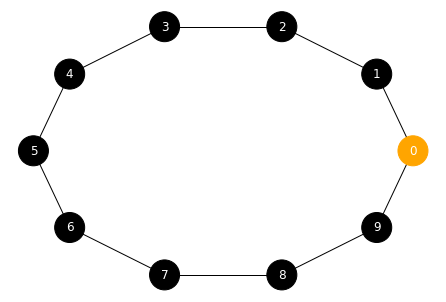

In [67]:
G = nx.Graph()
G.add_nodes_from(range(0,10))
G.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,0)])

# Find the ranking of all nodes, and the max ranged node
vals = np.array(list(nx.pagerank(G).values()))
m = np.argmax(vals)

# Draw the graph
nx.draw(G, 
        pos=nx.circular_layout(G), 
        with_labels=True, 
        node_color=['black' if k != m else 'orange' for k in range(n)], 
        node_size=(300*vals)**2,
        font_color="white")

# Get pagerank values
list(nx.pagerank(G).values())

Alternatively, we could consider the complete graph:

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

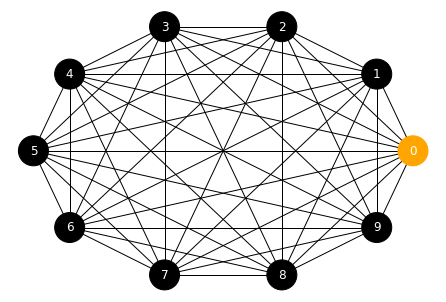

In [66]:
G = nx.complete_graph(10) # Completely connected graph with 10 nodes

# Find the ranking of all nodes, and the max ranged node
vals = np.array(list(nx.pagerank(G).values()))
m = np.argmax(vals)

# Draw the graph
nx.draw(G,
        pos=nx.circular_layout(G),
        with_labels=True, 
        node_color=['black' if k != m else 'orange' for k in range(n)], 
        node_size=(300*vals)**2,
        font_color="white")

# Get pagerank values
list(nx.pagerank_scipy(G).values())

*** 
8.b)

We **can** construct a 10 node, connected graph in which all nodes are ranked differently:

[0.04978623485024754, 0.12277715443388021, 0.07800984048688246, 0.099613565039
18042, 0.0934134253784765, 0.1185794737228728, 0.1470095267508527, 0.091410678
52977633, 0.12339300716964863, 0.0760070936381823]

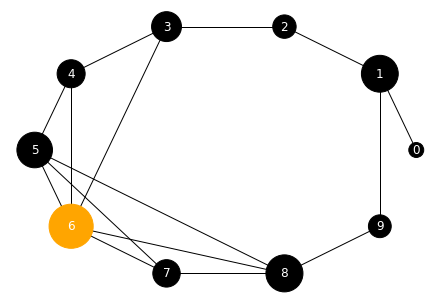

In [65]:
# Graphs with nodes of different ranks
B = nx.Graph()
B.add_nodes_from([i for i in range(10)])
B.add_edges_from([(0,1),(1,2),(1,9),(2,3),(3,4),(3,6),(4,5),(4,6),
                  (5,6),(5,7),(5,8),(6,7),(6,8),(7,8),(8,9)])

# Find the ranking of all nodes, and the max ranged node
vals = np.array(list(nx.pagerank(B).values()))
m = np.argmax(vals)

# Draw the graph
nx.draw(B,
        pos=nx.circular_layout(B),
        with_labels=True, 
        node_color=['black' if k != m else 'orange' for k in range(n)], 
        node_size=(300*vals)**2,
        font_color="white")

# Find the page ranks 
list(nx.pagerank(B).values())

Alternatively we could try our luck with a random graph with a $50\%$ chance of edge generation

[0.08323033007012198, 0.13571591993816567, 0.08419401727548728, 0.098543048985
22989, 0.11802947479826474, 0.13422244268612996, 0.08098217733338475, 0.116351
33169219788, 0.06609186121233433, 0.08263939600868353]

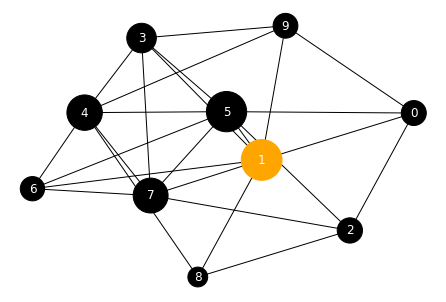

In [5]:
n, p = 10, 0.5
G = nx.fast_gnp_random_graph(n, p)

# Find the ranking of all nodes, and the max ranged node
vals = np.array(list(nx.pagerank(G).values()))
m = np.argmax(vals)

nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        with_labels=True, 
        node_color=['black' if k != m else 'orange' for k in range(n)], 
        node_size=(300*vals)**2,
        font_color="white")

list(nx.pagerank_numpy(G).values())

***

#### c)

To find a 10 node, connected graph in which there are two sets $A$ and $B$ of $5$ nodes for which all nodes in $A$ are ranked the same and all nodes in $B$ are ranked the same we define $G(V,E)$ such that:

$$V = \{0, 1, 2, 3, 4, 5, 6, 7, 8, 9\}$$

$$E = \{(0,1),(1,2),(2,3),(3,4),(4,1),(5,0),(6,1),(7,2),(8,3),(9,4)\}.$$

Now let

$$A = \{0, 1, 2, 3, 4\} \text{ and } B = \{5, 6, 7, 8, 9\}.$$

Then calling `pagerank(G)` and fetching the values provides us with :

$$\text{Page Rank of nodes in } A = 0.1441556969364921$$
and
$$\text{Page Rank of nodes in } B  = 0.055844303063507836.$$

[0.1441556969364921, 0.1441556969364921, 0.1441556969364921, 0.144155696936492
1, 0.1441556969364921, 0.055844303063507836, 0.055844303063507836, 0.055844303
063507836, 0.055844303063507836, 0.055844303063507836]

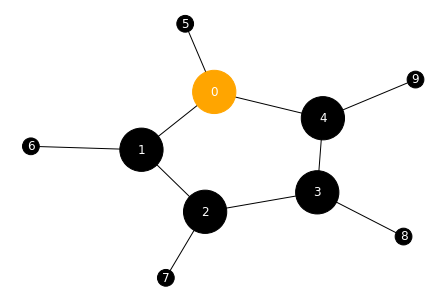

In [7]:
G = nx.Graph()
G.add_nodes_from(range(0,10))
E = [(0,1),(1,2),(2,3),(3,4),(4,0),(5,0),(6,1),(7,2),(8,3),(9,4)]
G.add_edges_from(E)

# Find the ranking of all nodes, and the max ranged node
vals = np.array(list(nx.pagerank(G).values()))
m = np.argmax(vals)

# Draw the graph
nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        with_labels=True, 
        node_color=['black' if k != m else 'orange' for k in range(n)], 
        node_size=(300*vals)**2,
        font_color="white")

list(nx.pagerank(G).values())

Alternatively, there's also this awesome star shape:

{0: 0.10421048620637098, 1: 0.10421048620637098, 2: 0.10421048620637098, 3: 0.
10421048620637098, 4: 0.10421048620637097, 5: 0.09578951379362903, 6: 0.095789
51379362903, 7: 0.09578951379362903, 8: 0.09578951379362903, 9: 0.095789513793
62903}

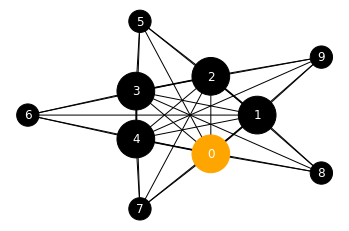

In [6]:
A = [0,1,2,3,4]
B = [5,6,7,8,9]
N = A + B
G = nx.Graph()
G.add_nodes_from(N)
G.add_edges_from([(0,1),(0,2),(0,3),(0,4),(0,5),(0,6),(0,7),(0,8),(0,9),(1,2),(1,3),
                    (1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(2,3),(2,4),(2,5),(2,6),(2,7),(2,8),(2,9),
                   (3,4),(3,5),(3,6),(3,7),(3,8),(3,9),(4,5),(4,6),(4,7),(4,8),(4,9)])

# Find the ranking of all nodes, and the max ranged node
vals = np.array(list(nx.pagerank(G).values()))
m = np.argmax(vals)

basic_graph,ax = plt.subplots(1,1)
nx.draw(G,
        ax=ax, 
        pos=nx.kamada_kawai_layout(G),
        with_labels=True,  
        node_color=['black' if k != m else 'orange' for k in range(n)], 
        node_size=(300*vals)**2,
        font_color="white")
nx.pagerank(G, alpha=0.1)

### Motivating resources:

- The Pagerank paper: http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf
- "THE $25,000,000,000 EIGENVECTOR": https://pages.uoregon.edu/botvinn/googleMath22.pdf
- https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html